Aufgabe 48.

Unten sehen Sie das Ergebnis einer linearen Regression mit dem Datensatz Carseats. Die Zielgröße ist Sales. Als erklärende Variablen wurden Price, Income und Education verwendet, um die Verkaufszahlen vorherzusagen.

In [18]:
import pandas as pd
from utils import *
from statsmodels.api import OLS, add_constant, qqplot
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

In [19]:
sns.set(style="whitegrid")
pd.set_option('display.max_columns', 100)
healthy_orange = '#EC6602'
healthy_orange_50 = '#F9B591'
healthy_orange_25 = '#FDDDCB'
siemens_petrol = '#009999'
siemens_petrol_50 = '#87D2D2'
sns.set_palette([healthy_orange, siemens_petrol, healthy_orange_50, healthy_orange_25, siemens_petrol_50])
RANDOM_SEED = 42

In [20]:
df = pd.read_csv('../data/Carseats.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [21]:
X = df[['Price', 'Income', 'Education']]
y = df['Sales']
X = add_constant(X)
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     36.30
Date:                Sat, 07 Jun 2025   Prob (F-statistic):           9.64e-21
Time:                        22:04:33   Log-Likelihood:                -933.77
No. Observations:                 400   AIC:                             1876.
Df Residuals:                     396   BIC:                             1892.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.2673      0.987     13.443      0.0

a) Interpretieren Sie das Vorzeichen, die geschätzten Regressionskoeffizienten und die zugehörigen p-Werte. Welche Variablen haben einen signifikanten Einfluss auf die Verkaufszahlen?

    - `Price` ist signifikant und negativ korriliert
    - `Income` ist auch signifikant und positiv korriliert

b) Wie hoch ist der erklärte Anteil der Varianz? Bewerten Sie die Modellgüte auf Basis von R2 und dem adjustierten R2?

Der erklärte Anteil der Varianz beträgt 0.216. Angesichts der Tatsache dass wir früher in der Aufgabe 36 für den gleichen Datensatz bis zum 0.865 bzw. 0.863 R2 bzw. R2-Adjusted geschafft haben, ich finde dieses Modell deutlich schlechter. 

c) Beachten Sie die Hinweise zu den Modellannahmen:
- Was sagt die Durbin-Watson-Statistik aus?
- Was zeigen die Werte für Schiefe und Kurtosis sowie der Jarque-Bera-Test?
- Wie interpretieren Sie die Warnung zum Condition Number?

    - Durbin Watsin ungefähr 2 heißt: es gibt keine Autokorrelation, in unserem Fall ist es ein bisschen kleiner als 2, also leicht positiv korreliert 

    - Schiefe ungefähr gleich 0 heißt: symmetrisch, Kurtosis ungefähr gleich 3 heißt: die Wölbung sind wie Normalverteilt und Prob(JB) = 0.253 > 0.05 heißt die Nullhypothese, dass die Residuen normalverteilt sind, kann nicht abgeleht werden mit Signifikanz Niveau von 5%
    
    - Condition Number heißt: es gibt ein lineares Zusammenhang zwischen den Prädiktoren, je größer Condition Number ist, desto stärker ist der Zusammenhand. Die kleinste Condition Number ist 1, was heißt dass die Spalten von Designmatrix orthogonal sind bzw. keine lineare Korrelation haben

d) Welche Annahmen könnten auf Basis dieser Informationen verletzt sein?

Annahme 5: keine Perfekte Kollinearität

e) Was würden Sie als nächstes tun, um das Modell zu verbessern oder die Gültigkeit zu überprüfen? Führen Sie mindestens einen Schritt durch und bewerten Sie dessen Erfolg

In [22]:
exog = model.model.exog
vif = pd.DataFrame({
    'VIF': [variance_inflation_factor(exog, i) for i in range(exog.shape[1])],
    'Variable': model.model.exog_names
})
vif

,VIF,Variable
0,61.815677,const
1,1.003298,Price
2,1.006413,Income
3,1.003316,Education


Ich würde zuerst VIF angucken, um zu schauen, welche Variablen starke Kollinearität hinweisen, aber hier sind sie alle ungefähr 1, was auf keine Multikollinearität hindeutet.

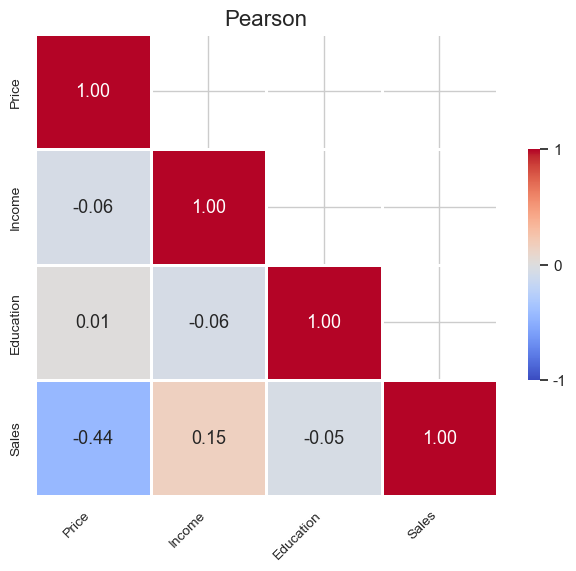

In [23]:
num_corr_heatmap(df[['Price', 'Income', 'Education', 'Sales']].corr())

In [24]:
X = df[['Price', 'Income']]
y = df['Sales']
X = add_constant(X)
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     54.07
Date:                Sat, 07 Jun 2025   Prob (F-statistic):           1.70e-21
Time:                        22:04:33   Log-Likelihood:                -934.17
No. Observations:                 400   AIC:                             1874.
Df Residuals:                     397   BIC:                             1886.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.6615      0.715     17.704      0.0

f) Führen Sie eine visuelle Diagnostik durch: Erstellen Sie einen Residuenplot, ein Histogramm der Residuen und einen QQ-Plot. Welche Modellannahmen können Sie damit überprüfen? Was fällt Ihnen auf?

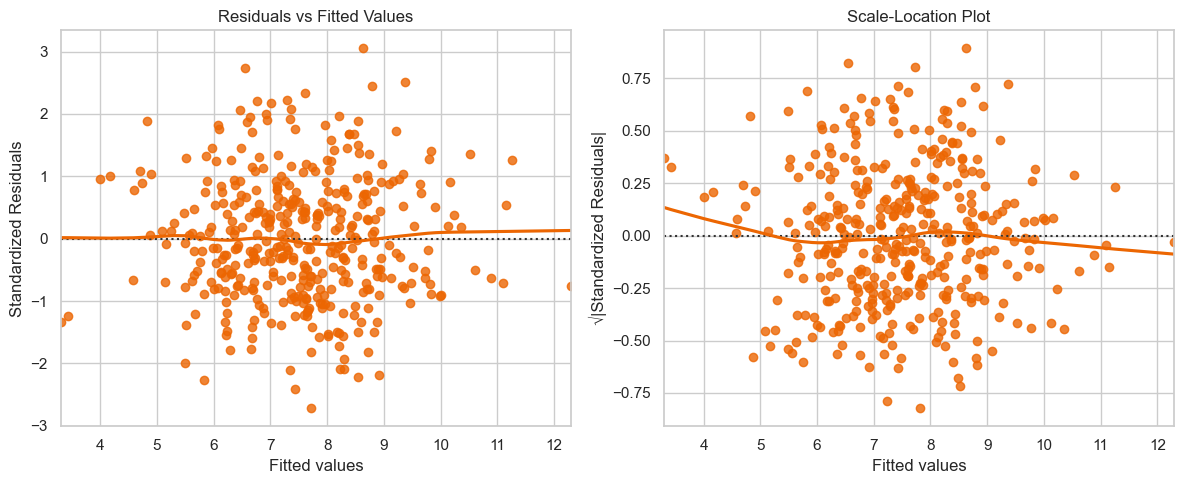

Breusch-Pagan test statistic: p-value = 0.8761
F-statistic: p-value = 0.8769
ARCH test statistic: p-value = 0.9215
F-statistic: p-value = 0.9246
White test statistic: p-value = 0.3436
F-statistic: p-value = 0.3462
Goldfeld-Quandt test statistic: p-value = 0.7984


In [25]:
check_homoscedasticity(model);

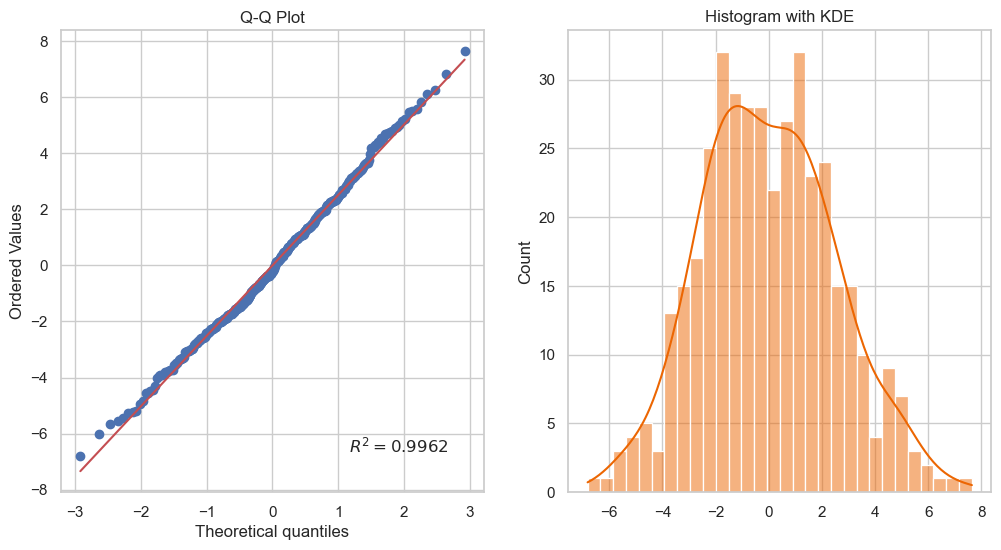

Shapiro-Wilk normality test: p-value = 0.3528
D'Agostino's K^2 normality test: p-value = 0.2548
Kolmogorov-Smirnov normality test: p-value = 0.5596
Anderson-Darling normality test: statistic = 0.5572, critical value = 0.7790


In [26]:
check_normality(model.resid);

Man könnte damit die Annahmen 3 und 6 überprüfen, es fällt mir auf dass die Varianz in der Mitte größer ist als an den Rändern also ein Hinweis für Heteroskedastizität aber die Tests bestätigen, dass es keine Heteroskedastizität gibt.

g) Berechnen Sie die Variance Infation Factors (VIFs) für die erklärenden Variablen. Was sagen diese über mögliche Multikollinearität im Modell aus?

In [27]:
exog = model.model.exog
vif = pd.DataFrame({
    'VIF': [variance_inflation_factor(exog, i) for i in range(exog.shape[1])],
    'Variable': model.model.exog_names
})
vif

,VIF,Variable
0,32.477507,const
1,1.003225,Price
2,1.003225,Income


VIF ungefähr gleich 1 heißt keine Multikollinearität

h) Verwenden Sie from sklearn.preprocessing import StandardScaler, um die Prädiktoren zu standardisieren. Führen Sie anschließend die Regression erneut
mit den standardisierten Prädiktoren durch. Was verändert sich durch die Standardisierung? Was bleibt gleich? Wie interpretieren Sie diese Veränderungen?

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Price', 'Income']])
X_scaled = pd.DataFrame(X_scaled, columns=['Price', 'Income'])
X_scaled = add_constant(X_scaled)
model_scaled = OLS(y, X_scaled).fit()
print(model_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     54.07
Date:                Sat, 07 Jun 2025   Prob (F-statistic):           1.70e-21
Time:                        22:04:34   Log-Likelihood:                -934.17
No. Observations:                 400   AIC:                             1874.
Df Residuals:                     397   BIC:                             1886.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4963      0.125     59.734      0.0

Die Modellgutemaße wie R2, R2-Adjusted, AIC, BIC, P-Werte usw sind gleich glieben sowie die Vorzeichen der Koeffizienten. Was eigentlich verändert hat sind die tatsächlichen Koeffizienten und ihre Standardfehler und Konfidenzintervale.

Jetzt nach der Standardisierung kann man die Koeffizienten miteinander einfacher vergleichen weil sie die gleich Einheit haben und zwar ihre Standardabweichung. Z.B. man kann sagen Sales nimmt um 1.23 ab, wenn Preis um 1 Std steigt oder Sales nimmt um 0.35 ab, wenn Preis um 1 Std steigt.